# Practical Application - Lesson 9

In [66]:
import numpy as np
from datascience import *

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Problem 1

Find the mean tip broken down by sex. On one plot, build a histogram of tips for
males overlaid with a histogram of tips for females. 

2.8334482758620685
3.0896178343949043


C:\Users\C19William.Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


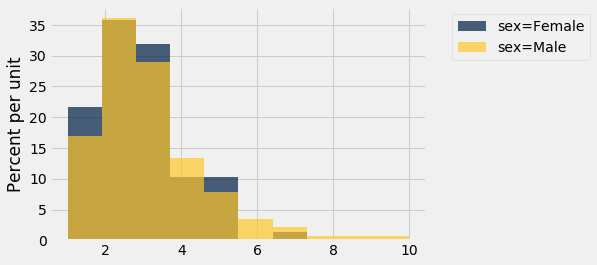

In [68]:
tips = Table.read_table('tips.csv')
female_tip_mean = np.average(tips.where("sex",are.containing("Female")).column("tip"))
male_tip_mean = np.average(tips.where("sex",are.containing("Male")).column("tip"))

print(female_tip_mean)
print(male_tip_mean)

plot_table = tips.select("sex","tip")
plot_table.hist("tip", group='sex')

As we can see, males give a higher average tip than females,

Next, repeat the above, except broken down by time of day instead of by sex

2.728088235294118
3.102670454545454


C:\Users\C19William.Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


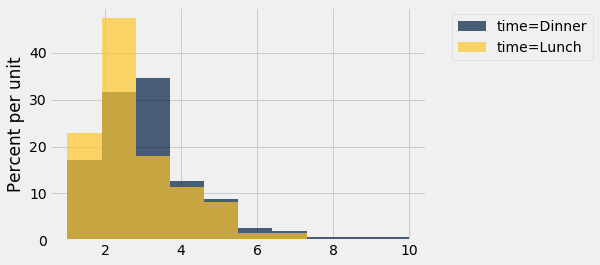

In [69]:
lunch_tip_mean = np.average(tips.where("time",are.containing("Lunch")).column("tip"))
dinner_tip_mean = np.average(tips.where("time",are.containing("Dinner")).column("tip"))

print(lunch_tip_mean)
print(dinner_tip_mean)

plot_table = tips.select("time","tip")
plot_table.hist("tip", group="time")

From this, we can see that on average, a higher tip is given at dinner than at lunch

## Problem 2

Create a function called weekday_to_num. This function inputs a string denoting day of
the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues =
2, … Sun = 7).

In [70]:
def weekday_to_num(weekday):
    """This function takes the day of the week as an input and returns a numerical value starting at Monday"""
    days_table = Table()
    days_table = days_table.with_columns("Day",make_array("Mon","Tues","Wed","Thur","Fri","Sat","Sun"),
                                         "Number",make_array(1,2,3,4,5,6,7))
    day = days_table.where("Day",are.containing(weekday)).column("Number")[0]
    return day

## Problem 3

Apply this function to the day column of tips and include the result as a new column in
tips, called weekday_num.

In [71]:
tips = tips.with_column(
    "day(#)",
    tips.apply(weekday_to_num,"day"))
tips

total_bill,tip,sex,smoker,day,time,size,day(#)
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


## Problem 4

Create a function called est_tip. The goal of this function is to predict tip amount
based on the value of the bill (total_bill). To do this, we will look at “nearby” values
(i.e. tip, where the value of total_bill is near the value of interest.) For example, if
we want to predict the tip for total bill value of \$20, we will simply look at all total bills
near \$20 and average the tip amount. The input of est_tip should be the total bill
amount and the window, or the difference in total bill we would consider “nearby”. For
example, for a window of \$1, we will look at all bills totaling \$19 thru \$21. The output of
this function will be the predicted tip amount.

In [72]:
def predict_tip(cost, margin):
    """This function will take a given cost and a margin and predict a tip amount based on aggregate date"""
    tips_applicable = tips.where("total_bill",are.between_or_equal_to(cost - margin, cost + margin))
    tip = np.average(tips_applicable.column("tip"))
    return tip

## Problem 5
Apply this function to the total_bill column of tips and include the result as a new
column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip
amount.

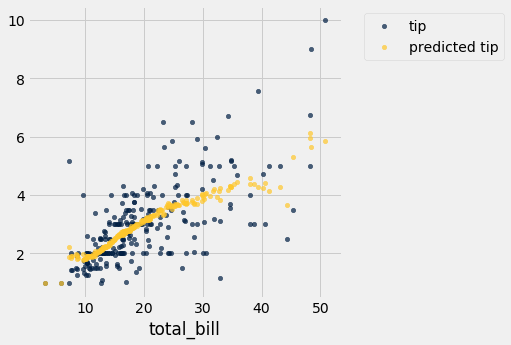

In [73]:
tips = tips.with_column(
    "predicted tip",
    tips.apply(predict_tip,"total_bill",1))
tips.scatter("total_bill",("tip","predicted tip"))